In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin

In [2]:
#Task A
ticker = 'AMZN'
ticker = yfin.Ticker(ticker)

data = ticker.history(period='5y')

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-08 00:00:00-05:00,159.000000,159.531998,157.110001,159.134995,70754000,0.0,0.0
2021-01-11 00:00:00-05:00,157.400497,157.819000,155.500000,155.710495,73668000,0.0,0.0
2021-01-12 00:00:00-05:00,156.000000,157.106995,154.300003,156.041504,70292000,0.0,0.0
2021-01-13 00:00:00-05:00,156.421997,159.497498,156.104004,158.294495,66424000,0.0,0.0
2021-01-14 00:00:00-05:00,158.376007,158.899994,156.029495,156.373505,61418000,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-31 00:00:00-05:00,232.910004,232.990005,230.119995,230.820007,24383700,0.0,0.0
2026-01-02 00:00:00-05:00,231.339996,235.460007,224.699997,226.500000,51456200,0.0,0.0
2026-01-05 00:00:00-05:00,228.839996,234.000000,227.179993,233.059998,49733300,0.0,0.0


<Axes: xlabel='Date', ylabel='Amazon Stock Prices'>

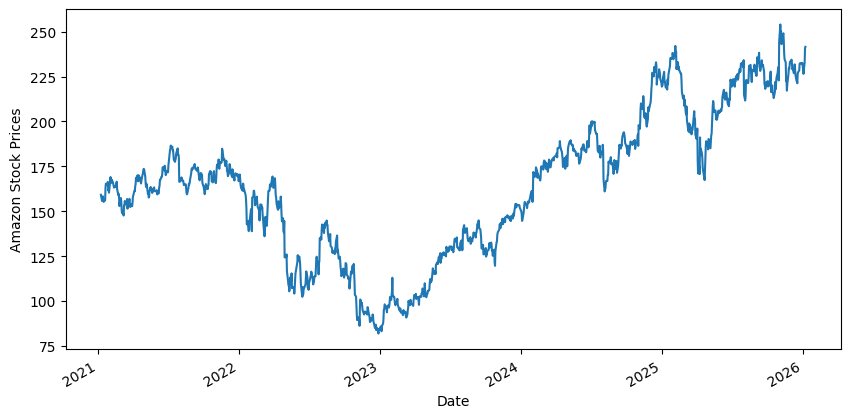

In [4]:
#Simple Line Chart
plt.ylabel("Amazon Stock Prices")

data['Close'].plot(figsize=(10,5))

In [5]:
#Task B
#MA20
data['MA_20'] = data['Close'].rolling(window=20).mean()

#MA50
data['MA_50'] = data['Close'].rolling(window=50).mean()

#EMA20
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

#RSI
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,EMA_20,RSI
Date,,,,,,,,,,,
2021-01-08 00:00:00-05:00,159.000000,159.531998,157.110001,159.134995,70754000,0.0,0.0,NaN,NaN,159.134995,NaN
2021-01-11 00:00:00-05:00,157.400497,157.819000,155.500000,155.710495,73668000,0.0,0.0,NaN,NaN,158.808852,NaN
2021-01-12 00:00:00-05:00,156.000000,157.106995,154.300003,156.041504,70292000,0.0,0.0,NaN,NaN,158.545295,NaN
2021-01-13 00:00:00-05:00,156.421997,159.497498,156.104004,158.294495,66424000,0.0,0.0,NaN,NaN,158.521409,NaN
2021-01-14 00:00:00-05:00,158.376007,158.899994,156.029495,156.373505,61418000,0.0,0.0,NaN,NaN,158.316847,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-31 00:00:00-05:00,232.910004,232.990005,230.119995,230.820007,24383700,0.0,0.0,228.772501,231.436801,229.774434,48.034414
2026-01-02 00:00:00-05:00,231.339996,235.460007,224.699997,226.500000,51456200,0.0,0.0,228.478500,231.526201,229.462584,43.061674
2026-01-05 00:00:00-05:00,228.839996,234.000000,227.179993,233.059998,49733300,0.0,0.0,228.676000,231.828401,229.805194,61.561759


In [6]:
data = data.dropna()



In [7]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,EMA_20,RSI
Date,,,,,,,,,,,
2021-03-22 00:00:00-04:00,153.392502,156.328995,153.002502,155.543503,58044000,0.0,0.0,153.816077,159.131050,155.096934,51.282577
2021-03-23 00:00:00-04:00,156.350006,159.100006,156.042496,156.875000,76346000,0.0,0.0,153.673576,159.085850,155.266273,61.539807
2021-03-24 00:00:00-04:00,157.552002,158.015503,154.257507,154.353500,59180000,0.0,0.0,153.492426,159.058710,155.179343,59.169335
2021-03-25 00:00:00-04:00,153.649506,155.488998,151.856995,152.313004,71270000,0.0,0.0,153.465176,158.984140,154.906358,53.723473
2021-03-26 00:00:00-04:00,152.203003,152.832993,149.800003,152.601501,66258000,0.0,0.0,153.362926,158.870280,154.686848,58.743973
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-31 00:00:00-05:00,232.910004,232.990005,230.119995,230.820007,24383700,0.0,0.0,228.772501,231.436801,229.774434,48.034414
2026-01-02 00:00:00-05:00,231.339996,235.460007,224.699997,226.500000,51456200,0.0,0.0,228.478500,231.526201,229.462584,43.061674
2026-01-05 00:00:00-05:00,228.839996,234.000000,227.179993,233.059998,49733300,0.0,0.0,228.676000,231.828401,229.805194,61.561759


In [8]:
# Initialising X and assigning the two feature variables
X = data[['EMA_20','MA_50']]

# Getting the head of the data
X.head()

,EMA_20,MA_50
Date,,
2021-03-22 00:00:00-04:00,155.096934,159.13105
2021-03-23 00:00:00-04:00,155.266273,159.08585
2021-03-24 00:00:00-04:00,155.179343,159.05871
2021-03-25 00:00:00-04:00,154.906358,158.98414
2021-03-26 00:00:00-04:00,154.686848,158.87028


In [9]:
# Setting-up the dependent variable
y = data['Close']

# Getting the head of the data
y.head()

,Close
Date,
2021-03-22 00:00:00-04:00,155.543503
2021-03-23 00:00:00-04:00,156.875000
2021-03-24 00:00:00-04:00,154.353500
2021-03-25 00:00:00-04:00,152.313004
2021-03-26 00:00:00-04:00,152.601501


In [10]:
#Task C

# Setting the training set to 70% of the data
training = 0.7
t = int(training*len(data))

# Define Train Dataset
X_train = X[:t]
y_train = y[:t]

# Define Test Dataset
X_test = X[t:]
y_test = y[t:]

In [11]:
X[:t]


,EMA_20,MA_50
Date,,
2021-03-22 00:00:00-04:00,155.096934,159.131050
2021-03-23 00:00:00-04:00,155.266273,159.085850
2021-03-24 00:00:00-04:00,155.179343,159.058710
2021-03-25 00:00:00-04:00,154.906358,158.984140
2021-03-26 00:00:00-04:00,154.686848,158.870280
...,...,...
2024-07-23 00:00:00-04:00,189.963403,187.497000
2024-07-24 00:00:00-04:00,189.093555,187.364001
2024-07-25 00:00:00-04:00,188.213217,187.229601


In [12]:
y[:t]

,Close
Date,
2021-03-22 00:00:00-04:00,155.543503
2021-03-23 00:00:00-04:00,156.875000
2021-03-24 00:00:00-04:00,154.353500
2021-03-25 00:00:00-04:00,152.313004
2021-03-26 00:00:00-04:00,152.601501
...,...
2024-07-23 00:00:00-04:00,186.410004
2024-07-24 00:00:00-04:00,180.830002
2024-07-25 00:00:00-04:00,179.850006


In [13]:
X[t:]

,EMA_20,MA_50
Date,,
2024-07-30 00:00:00-04:00,186.716476,187.044000
2024-07-31 00:00:00-04:00,186.741573,187.089600
2024-08-01 00:00:00-04:00,186.487138,187.100201
2024-08-02 00:00:00-04:00,184.716934,186.795201
2024-08-05 00:00:00-04:00,182.460083,186.353000
...,...,...
2025-12-31 00:00:00-05:00,229.774434,231.436801
2026-01-02 00:00:00-05:00,229.462584,231.526201
2026-01-05 00:00:00-05:00,229.805194,231.828401


In [14]:
y[t:]

,Close
Date,
2024-07-30 00:00:00-04:00,181.710007
2024-07-31 00:00:00-04:00,186.979996
2024-08-01 00:00:00-04:00,184.070007
2024-08-02 00:00:00-04:00,167.899994
2024-08-05 00:00:00-04:00,161.020004
...,...
2025-12-31 00:00:00-05:00,230.820007
2026-01-02 00:00:00-05:00,226.500000
2026-01-05 00:00:00-05:00,233.059998


In [15]:
#Reproducible Seed
import numpy as np
np.random.seed(42)

In [16]:
#Task D

#Define Linear Regression Model
from sklearn.linear_model import LinearRegression

#Train Linear Regression Model
model = LinearRegression().fit(X_train,y_train)
print("Linear Regression Model Defined and Trained")


Linear Regression Model Defined and Trained


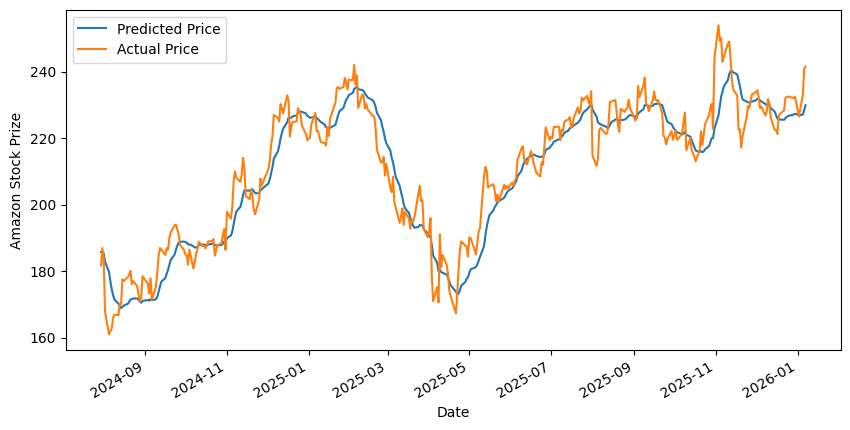

The model has a 89.55% accuracy.


In [17]:
#Task E

#Test Linear Regression Model
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Close'])

#Visualise Linear Regression Model
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Amazon Stock Prize")
plt.show()

# Compute the accuracy of Linear Regression Model
R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

In [18]:
#Task F

#Extract alpha & beta values
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')


alpha = 2.7615504787408724
betas = [ 1.51580243 -0.53455883]


In [19]:
#Formulate Linear Regression Model
alpha = model.intercept_
beta1, beta2 = model.coef_

sign = "-" if beta2 < 0 else "+"

print(f"Linear Regression Model: ŷ = {alpha:.4f} + {beta1:.4f}(EMA_20) {sign} {abs(beta2):.4f}(MA_50)")

Linear Regression Model: ŷ = 2.7616 + 1.5158(EMA_20) - 0.5346(MA_50)


In [21]:
#Task G
X_rf = data[['MA_20', 'EMA_20', 'MA_50', 'RSI']]
y_rf = data['Close']

X_train_rf = X_rf[:t]
y_train_rf = y_rf[:t]

X_test_rf = X_rf[t:]
y_test_rf = y_rf[t:]

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(n_estimators=200, random_state=42)

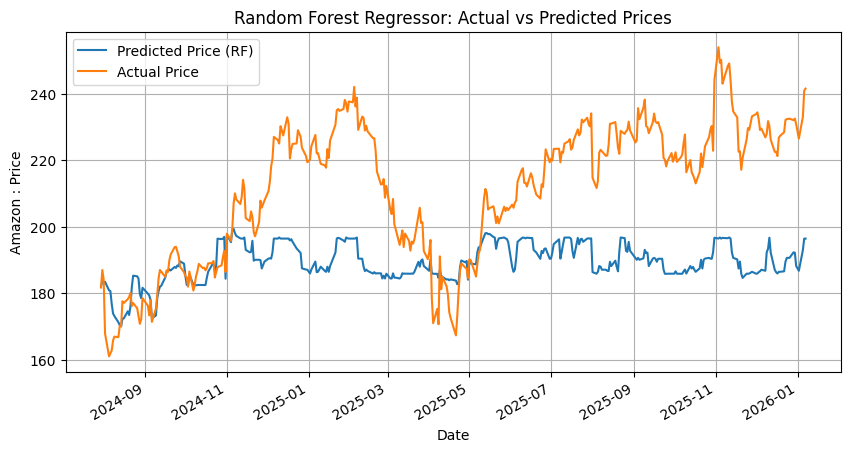

In [23]:
rf_predicted_price = rf_model.predict(X_test_rf)

rf_predicted_price = pd.DataFrame(
    rf_predicted_price,
    index=y_test_rf.index,
    columns=['Close']
)

rf_predicted_price.plot(figsize=(10,5))
y_test_rf.plot()
plt.legend(['Predicted Price (RF)', 'Actual Price'])
plt.ylabel("Amazon : Price")
plt.title("Random Forest Regressor: Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [24]:
rf_accuracy = rf_model.score(X_test_rf, y_test_rf) * 100
print("Random Forest Model Accuracy: {:.2f}%".format(rf_accuracy))

Random Forest Model Accuracy: -82.59%
